# Domain:
Marketing for Financial Services


# About:
DB Bank is a large public sector bank which has branches across the cities. It provides various services like savings account, current account, term deposits, personal loans, home loans etc. to customers. Whenever the bank conducts marketing on its new schemes, it will keep track of data related to customers’ personal, social and economic details. Also, it maintains the detailing on efforts made to achieve success in the campaign. 

Recently, the bank has conducted a campaign to market their term-deposit scheme. Campaigns was conducted based mostly on direct phone calls, soliciting the bank's customers to place a term deposit. After all the marking efforts, if the client had agreed to place a deposit, then the campaign is success, otherwise not (Target variable marked 'yes', or 'no').


# Problem statement
•	As a data analyst, what are the approaches do you suggest the marketing team to identify ideal target group to make the campaign successful?  Recommend based on your analysis.

In [565]:
import pandas as pd
import numpy as np

# Reading the data

In [725]:
data = pd.read_csv('Marketing_train.csv')

In [742]:
data.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'responded'],
      dtype='object')

In [731]:
coln=data.copy()

In [4]:
data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,5,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no


# Knowing the data

In [51]:
data.shape

(7360, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

In [471]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
custAge,7360.0,40.039592,9.218478,18.000,34.000,40.039592,44.000,94.000
campaign,7360.0,2.527310,2.702500,1.000,1.000,2.000000,3.000,40.000
pdays,7360.0,959.738587,193.522270,0.000,999.000,999.000000,999.000,999.000
previous,7360.0,0.184647,0.517405,0.000,0.000,0.000000,0.000,6.000
emp.var.rate,7360.0,0.046332,1.570338,-3.400,-1.800,1.100000,1.400,1.400
cons.price.idx,7360.0,93.570798,0.579582,92.201,93.075,93.444000,93.994,94.767
cons.conf.idx,7360.0,-40.569375,4.656141,-50.800,-42.700,-41.800000,-36.400,-26.900
euribor3m,7360.0,3.577028,1.746800,0.634,1.334,4.857000,4.961,5.045
nr.employed,7360.0,5164.950109,73.136768,4963.600,5099.100,5191.000000,5228.100,5228.100
responded,7360.0,0.114130,0.317991,0.000,0.000,0.000000,0.000,1.000


In [472]:
data.describe(include=object).T

,count,unique,top,freq
profession,7360,12,admin.,1867
marital,7360,4,married,4407
schooling,7360,8,university.degree,3671
default,7360,3,no,5931
housing,7360,3,yes,3810
loan,7360,3,no,6047
contact,7360,2,cellular,4683
month,7360,10,may,2523
day_of_week,7360,8,university.degree,3671
poutcome,7360,3,nonexistent,6300


# Primary data analysis
- campaign and custAge columns have outliers

# Data Cleaning 

In [10]:
data.duplicated().sum()

27

In [11]:
data.drop_duplicates(keep=False,inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
def missing_values(df):
    #Total missing values
    missing_vals = df.isnull().sum()
    
    #percentage missing values
    missing_values_per = 100 * df.isnull().sum()/len(df)
    
    #make a dataframe
    missing_valu_table = pd.concat([missing_vals,missing_values_per],axis=1)
    
    #rename the columns
    miss_vals_table_remaned = missing_valu_table.rename(columns={0:'Missing Values',1:'Percentage of missing'})
    
    #sort by percentage
    miss_vals_table_remaned = miss_vals_table_remaned[
        miss_vals_table_remaned.iloc[:,1] != 0].sort_values('Percentage of missing',ascending=False).round(2)
    
    return miss_vals_table_remaned

In [14]:
missing_values(data)

,Missing Values,Percentage of missing
schooling,2139,29.06
custAge,1778,24.16
day_of_week,707,9.61


In [509]:
data['custAge'].fillna(data['custAge'].mean(),inplace=True)
#data['custAge'].fillna(method='ffill',inplace=True)

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
freq_imputer = SimpleImputer(strategy='most_frequent')

In [35]:
data.loc[:,['schooling']] = freq_imputer.fit_transform(data.loc[:,['schooling']])

In [38]:
data.loc[:,['day_of_week']] = freq_imputer.fit_transform(data.loc[:,['schooling']])

In [270]:
missing_values(data)

,Missing Values,Percentage of missing


# Data Analysis

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [476]:
num_data = data.select_dtypes(include='number')

# Identifying the outliers

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


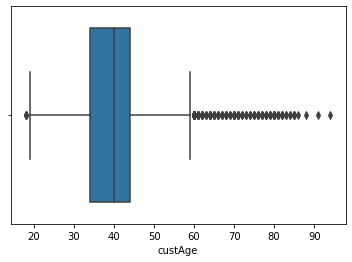

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


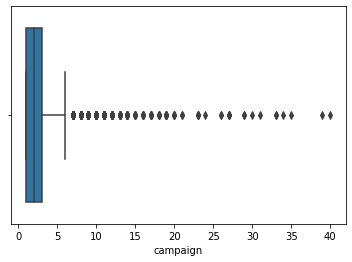

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


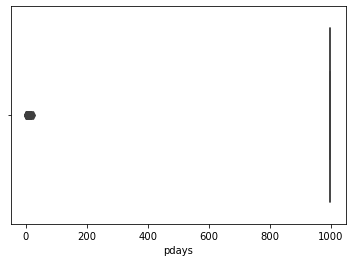

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


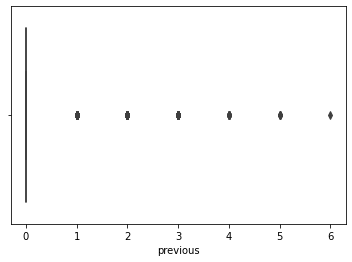

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


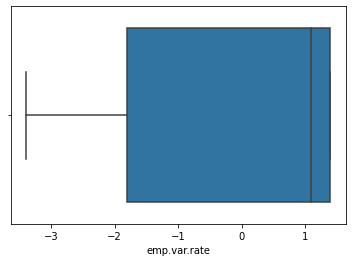

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


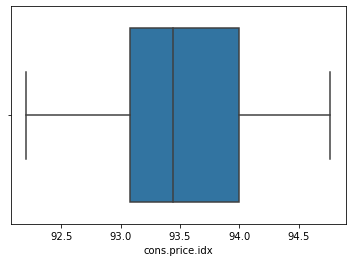

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


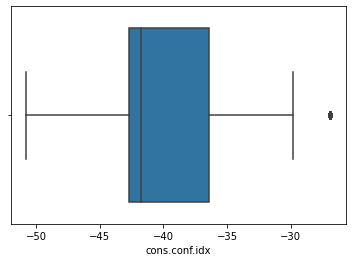

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


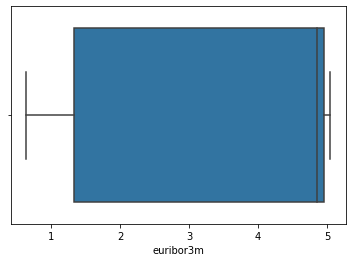

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


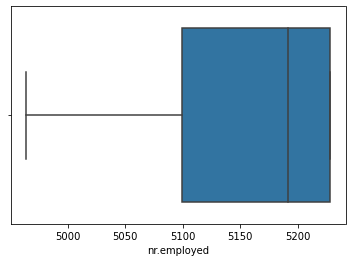

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


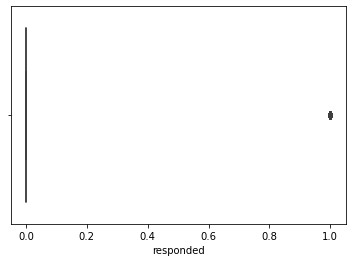

In [477]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

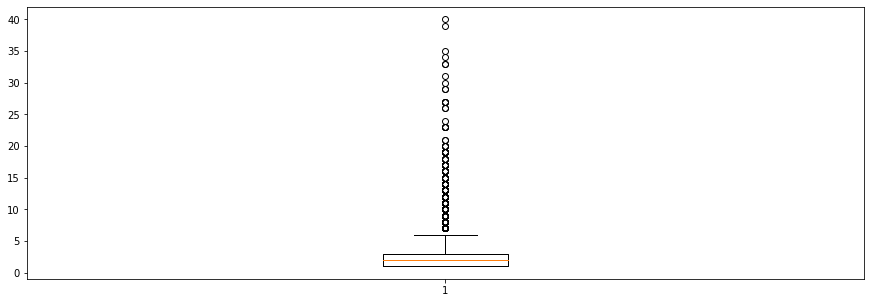

In [41]:
plt.figure(figsize=(15,5))
plt.boxplot(data['campaign']);

- we can say that campaign and custAge columns have outliers ,but the custage column is an significant varialbe so we are not removing the outliers.
- we can remove the outliers with the use of campaign 
- here for data with outliers and without outliers  there is no nignificant difference in data analysis .

# Treating the outliers

In [483]:
data1=data.copy()

In [484]:
IQR = data1['campaign'].quantile(0.75) - data1['campaign'].quantile(0.25)

In [485]:
upper_limit = data1['campaign'].quantile(0.75) + 1.5 * IQR

In [486]:
lower_limit = data1['campaign'].quantile(0.25) - 1.5 * IQR

In [487]:
upper_limit, lower_limit

(6.0, -2.0)

In [488]:
outliers=data1[(data1['campaign'] > upper_limit) | (data1['campaign'] < lower_limit) ]

In [492]:
outliers.shape

(411, 20)

- we have 411 outliers in campaign column

In [489]:
data1=data1[(data1['campaign'] < upper_limit) & (data1['campaign'] > lower_limit) ]

In [490]:
data1

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
0,55.000000,admin.,single,university.degree,unknown,no,no,cellular,nov,university.degree,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
1,40.039592,blue-collar,married,university.degree,no,no,no,cellular,jul,university.degree,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
2,42.000000,technician,married,high.school,no,no,no,telephone,may,high.school,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,55.000000,management,divorced,university.degree,unknown,yes,yes,cellular,jul,university.degree,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
4,40.039592,admin.,divorced,university.degree,no,yes,no,cellular,may,university.degree,5,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.000000,blue-collar,single,high.school,no,no,no,telephone,may,high.school,3,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
7410,45.000000,blue-collar,married,basic.4y,unknown,no,no,telephone,jul,basic.4y,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
7411,27.000000,blue-collar,single,university.degree,no,no,no,cellular,may,university.degree,2,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
7412,51.000000,unemployed,divorced,high.school,unknown,yes,no,cellular,nov,high.school,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0


In [94]:
data['campaign'].value_counts()

1     3153
2     1941
3      954
4      477
5      245
6      179
7      100
8       66
9       61
11      38
10      36
12      21
13      14
14      13
19       8
17       8
15       7
16       7
18       5
20       4
23       4
27       4
29       2
21       2
33       2
26       2
31       1
40       1
24       1
35       1
30       1
34       1
39       1
Name: campaign, dtype: int64

# Exploratory Data Analysis

In [512]:
data.groupby('responded').mean()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
responded,,,,,,,,,
0,39.925577,2.589571,983.310276,0.144325,0.219755,93.598905,-40.638328,3.777404,5174.525706
1,40.924561,2.044048,776.777381,0.497619,-1.299762,93.352635,-40.034167,2.021729,5090.625238


In [493]:
# Analysis of percentage turnout of marketing campaign

<AxesSubplot:xlabel='campaign'>

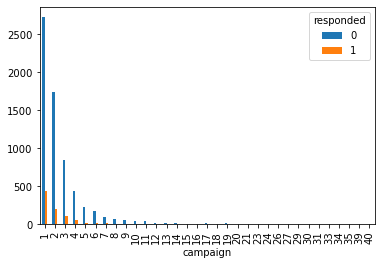

In [494]:
# data with outlier
pd.crosstab(data.campaign,data.responded).plot(kind='bar')

<AxesSubplot:xlabel='campaign'>

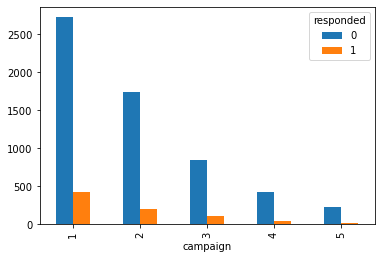

In [495]:
# data without outliers
pd.crosstab(data1.campaign,data1.responded).plot(kind='bar')

In [497]:
camp=pd.crosstab(data1.campaign,data1.responded)

In [504]:
camp["Percentage of Yes to Term Deposite"]=camp[1]/(camp[0]+camp[1])*100

In [505]:
camp

responded,0,1,Percentage of Yes to Term Deposite
campaign,,,
1,2723,430,13.637805
2,1741,200,10.303967
3,842,112,11.740042
4,430,47,9.853249
5,230,15,6.122449


In [527]:
camp1=pd.crosstab(data1.campaign,data1.responded)
camp1["Percentage of Yes with respect to campaign"]=camp1[1]/(camp1[1].sum())*100

In [528]:
camp1

responded,0,1,Percentage of Yes with respect to campaign
campaign,,,
1,2723,430,53.482587
2,1741,200,24.875622
3,842,112,13.930348
4,430,47,5.845771
5,230,15,1.865672


-  As increasing number of contacts performed during this campaign and for this client is results in decrease in Percentage of Yes to Term Deposite

In [516]:
cont=pd.crosstab(data1.contact,data1.responded)
cont["Percentageof Yes with respect to method of contact"]=cont[1]/(cont[0]+cont[1])*100

In [517]:
cont

responded,0,1,Percentageof Yes with respect to method of contact
contact,,,
cellular,3696,680,15.539305
telephone,2270,124,5.179616


In [529]:
cont1=pd.crosstab(data1.contact,data1.responded)
cont1["Percentage of Yes with respect to campaign"]=cont1[1]/(cont1[1].sum())*100

In [530]:
cont1

responded,0,1,Percentage of Yes with respect to campaign
contact,,,
cellular,3696,680,84.577114
telephone,2270,124,15.422886


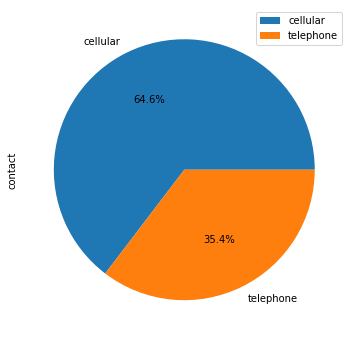

In [541]:
data1['contact'].value_counts().plot(kind='pie', figsize=(6,6), legend = True,autopct='%1.1f%%');

- Right mode to contact the customers is cellular when compare to telephone

<AxesSubplot:xlabel='contact'>

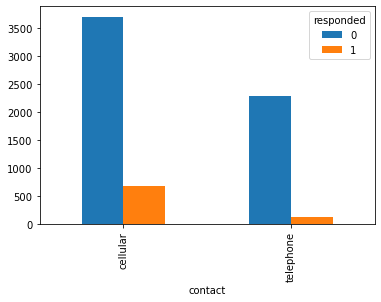

In [513]:
pd.crosstab(data1.contact,data1.responded).plot(kind='bar')

<AxesSubplot:xlabel='poutcome'>

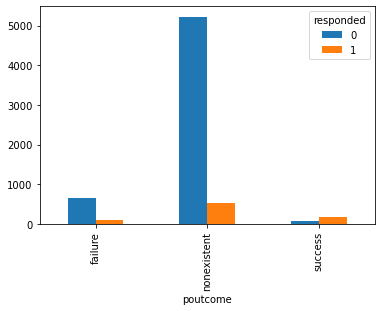

In [519]:
# Analysis on attempts made to turn a person into successful depositor
pd.crosstab(data1.poutcome,data1.responded).plot(kind='bar')

In [521]:
poutcome=pd.crosstab(data1.poutcome,data1.responded)
poutcome["Percentage of Yes with respect to poutcome"]=poutcome[1]/(poutcome[0]+poutcome[1])*100

In [523]:
poutcome1=pd.crosstab(data1.poutcome,data1.responded)
poutcome1["Percentage of Yes with respect to poutcome"]=poutcome1[1]/(poutcome1[1].sum())*100

In [524]:
poutcome1

responded,0,1,Percentage of Yes with respect to poutcome
poutcome,,,
failure,661,98,12.189055
nonexistent,5223,533,66.293532
success,82,173,21.517413


In [522]:
poutcome

responded,0,1,Percentage of Yes with respect to poutcome
poutcome,,,
failure,661,98,12.911726
nonexistent,5223,533,9.259903
success,82,173,67.843137


- from  previous marketing campaign we can say that the percentage of success rate is comparatively high when compare to failure 

In [531]:
# Personal data analysis on marital status, existing loans, education, profession etc. and its impact on the campaign’s success.

<AxesSubplot:xlabel='marital'>

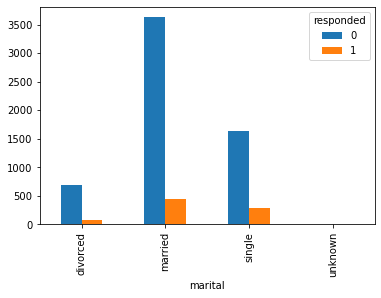

In [536]:
pd.crosstab(data1.marital,data1.responded).plot(kind='bar')

<AxesSubplot:xlabel='loan'>

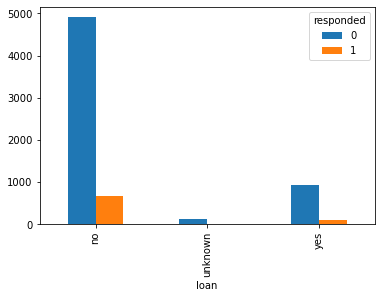

In [537]:
pd.crosstab(data1.loan,data1.responded).plot(kind='bar')

<AxesSubplot:xlabel='profession'>

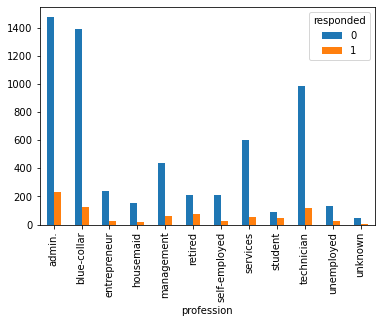

In [538]:
pd.crosstab(data1.profession,data1.responded).plot(kind='bar')

In [553]:
profession=pd.crosstab(data1.profession,data1.responded)
profession["Percentage of Yes with respect to over all Yes of profession"]=profession[1]/(profession[1].sum())*100
profession.sort_values(by="Percentage of Yes with respect to over all Yes of profession",ascending=False)

responded,0,1,Percentage of Yes with respect to over all Yes of profession
profession,,,
admin.,1472,233,28.980100
blue-collar,1392,126,15.671642
technician,986,116,14.427861
retired,212,74,9.203980
management,435,59,7.338308
services,602,52,6.467662
student,91,50,6.218905
entrepreneur,235,25,3.109453
unemployed,133,24,2.985075


In [555]:
profession=pd.crosstab(data1.profession,data1.responded)
profession["Percentage of Yes with respect to  profession"]=profession[1]/(profession[1]+profession[0])*100
profession.sort_values(by="Percentage of Yes with respect to  profession",ascending=False)

responded,0,1,Percentage of Yes with respect to profession
profession,,,
student,91,50,35.460993
retired,212,74,25.874126
unemployed,133,24,15.286624
admin.,1472,233,13.665689
unknown,48,7,12.727273
management,435,59,11.943320
technician,986,116,10.526316
entrepreneur,235,25,9.615385
housemaid,151,16,9.580838


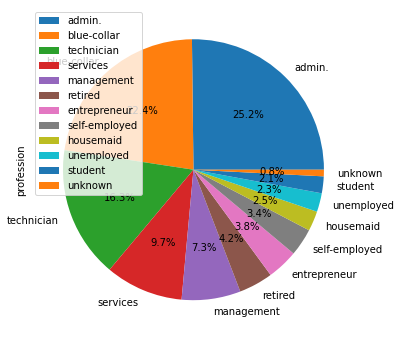

In [540]:
data1['profession'].value_counts().plot(kind='pie', figsize=(6,6), legend = True,autopct='%1.1f%%');

- We can say that the married peoples are more likely to have an term deposite
- admin,blue-collar,technician are the top 3 profession who made term deposite

In [535]:
data1

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
0,55.000000,admin.,single,university.degree,unknown,no,no,cellular,nov,university.degree,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
1,40.039592,blue-collar,married,university.degree,no,no,no,cellular,jul,university.degree,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
2,42.000000,technician,married,high.school,no,no,no,telephone,may,high.school,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,55.000000,management,divorced,university.degree,unknown,yes,yes,cellular,jul,university.degree,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
4,40.039592,admin.,divorced,university.degree,no,yes,no,cellular,may,university.degree,5,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.000000,blue-collar,single,high.school,no,no,no,telephone,may,high.school,3,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
7410,45.000000,blue-collar,married,basic.4y,unknown,no,no,telephone,jul,basic.4y,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
7411,27.000000,blue-collar,single,university.degree,no,no,no,cellular,may,university.degree,2,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
7412,51.000000,unemployed,divorced,high.school,unknown,yes,no,cellular,nov,high.school,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0


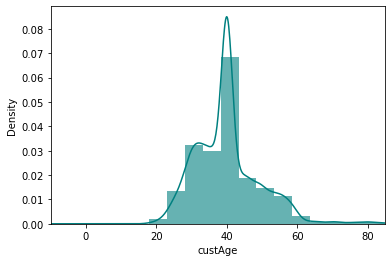

In [510]:
ax = data["custAge"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["custAge"].plot(kind='density', color='teal')
ax.set(xlabel='custAge')
plt.xlim(-10,85)
plt.show()

-from the graph it is easily visible that people are maximum in the age group 30-40. There are very few people above 60 and very less people below 18

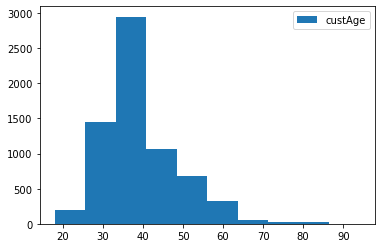

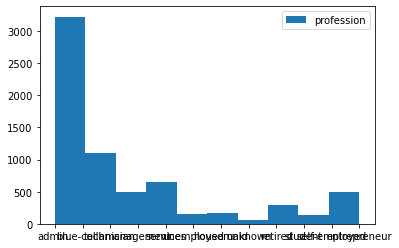

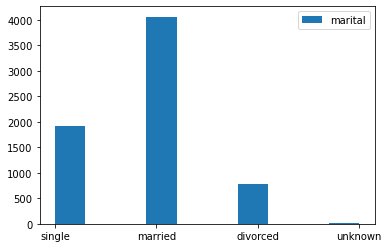

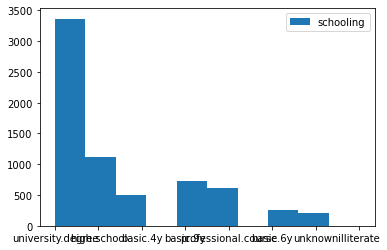

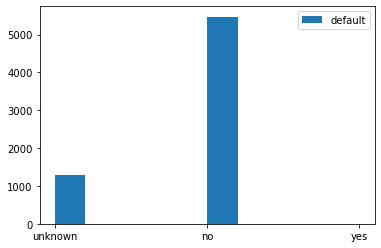

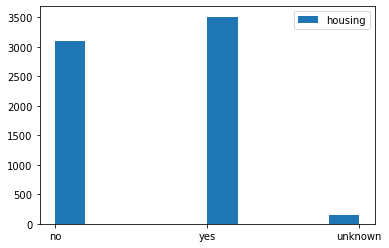

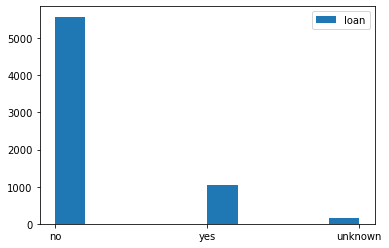

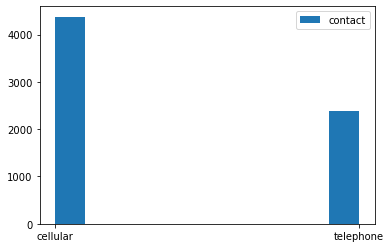

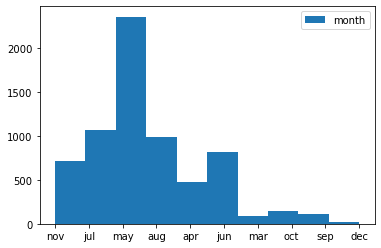

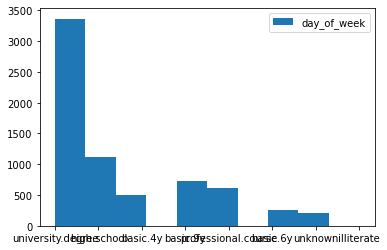

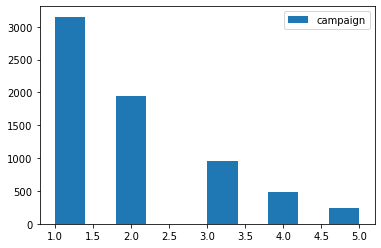

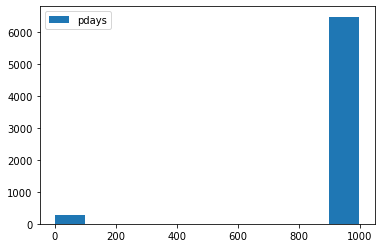

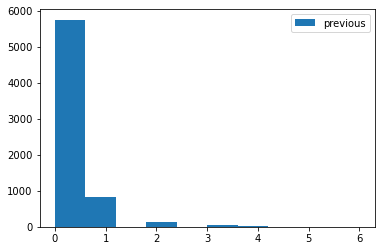

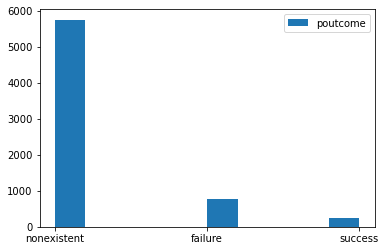

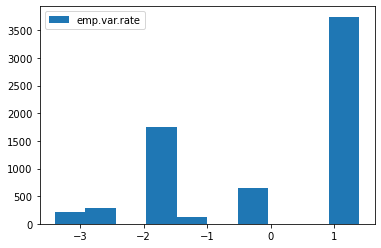

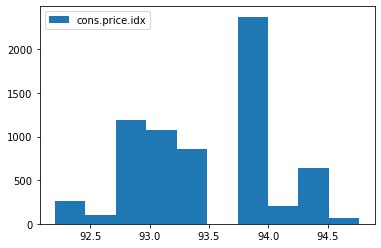

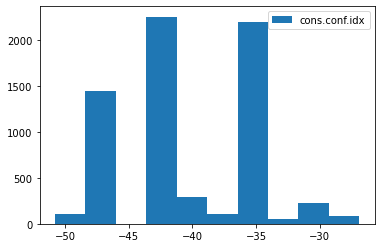

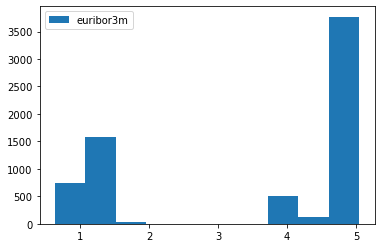

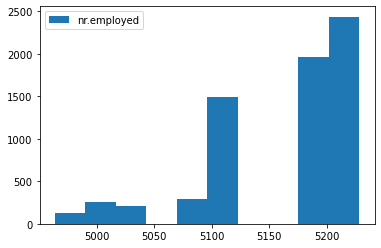

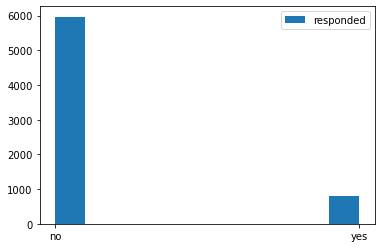

In [97]:
for col in data1:
    plt.hist(data1[col],label=col)
    plt.legend()
    plt.show()

- here we can see that some of the columns in data is not normally distributed so, to overcome this we can go for Transformation like log,square,squareroot...

# Knowing the colinearity between the variables

<AxesSubplot:>

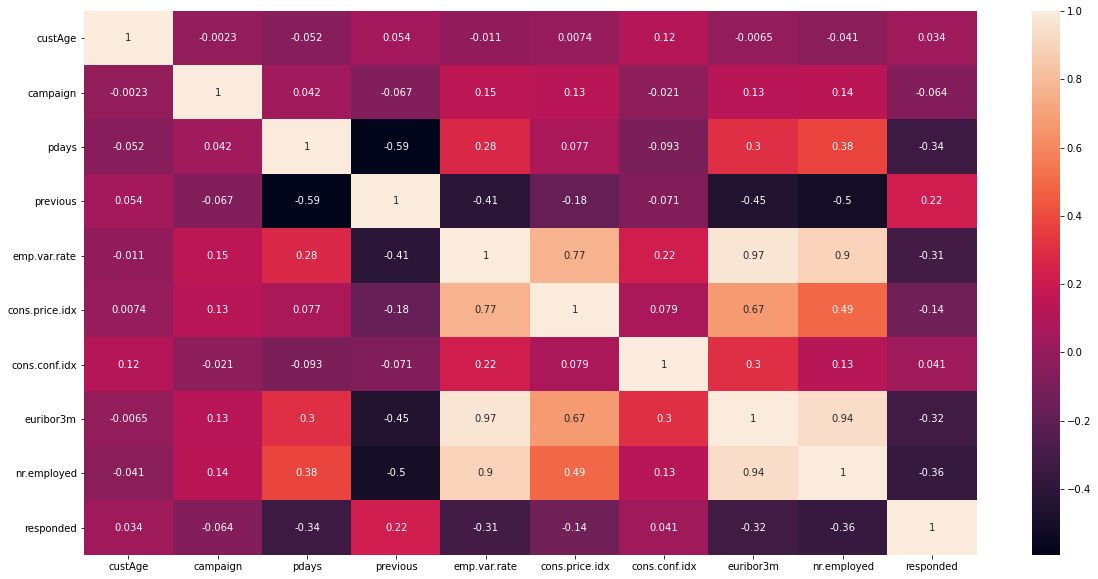

In [158]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True) 

- previous is showing highly colinearity between pdays, euribor3m and nr.employed so, we can remove pdays,euribor3m and nr.employed from the data

In [99]:
data['responded'].value_counts(normalize=True) * 100

no     88.586957
yes    11.413043
Name: responded, dtype: float64

In [100]:
data1['responded'].value_counts(normalize=True) * 100

no     88.124077
yes    11.875923
Name: responded, dtype: float64

- we can see that there is an huge data imabalance so we go for smapling techniques like upsampling,SMOTE,downsampling to balance the data

In [101]:
data.shape

(7360, 20)

In [102]:
data1.shape

(6770, 20)

In [557]:
# Defining the independent and dependent variable

In [103]:
x_features = list(data.columns)
x_features.remove('responded')
x_features

['custAge',
 'profession',
 'marital',
 'schooling',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [104]:
data['responded'] = data['responded'].map(lambda x : 1 if x == 'yes' else 0)

In [106]:
data['responded'].value_counts(normalize=True) * 100

0    88.586957
1    11.413043
Name: responded, dtype: float64

In [558]:
# Coverting the data using One hot encoding

In [156]:
encoded_data = pd.get_dummies(data[x_features], drop_first = True)

In [157]:
encoded_data.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,profession_blue-collar,...,month_sep,day_of_week_basic.6y,day_of_week_basic.9y,day_of_week_high.school,day_of_week_illiterate,day_of_week_professional.course,day_of_week_university.degree,day_of_week_unknown,poutcome_nonexistent,poutcome_success
0,55.000000,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,0,0,0,0,0,0,1,0,1,0
1,40.039592,1,999,0,1.4,93.918,-42.7,4.960,5228.1,1,...,0,0,0,0,0,0,1,0,1,0
2,42.000000,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,55.000000,2,999,0,1.4,93.918,-42.7,4.962,5228.1,0,...,0,0,0,0,0,0,1,0,1,0
4,40.039592,5,999,1,-1.8,92.893,-46.2,1.291,5099.1,0,...,0,0,0,0,0,0,1,0,0,0


In [366]:
y = data['responded']
x = encoded_data
x_columns=list(x.columns)
x_columns

['custAge',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'profession_blue-collar',
 'profession_entrepreneur',
 'profession_housemaid',
 'profession_management',
 'profession_retired',
 'profession_self-employed',
 'profession_services',
 'profession_student',
 'profession_technician',
 'profession_unemployed',
 'profession_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'schooling_basic.6y',
 'schooling_basic.9y',
 'schooling_high.school',
 'schooling_illiterate',
 'schooling_professional.course',
 'schooling_university.degree',
 'schooling_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_basic.6y',
 'day_of_week_basic.9y',
 'day_of_week_high.school',
 'day_of_week_il

# Building the model

# Using Logistic Regression

In [721]:
from sklearn.model_selection import train_test_split

In [722]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

# Feature selection

In [723]:
# function for finding the columns which are highly correlated
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

 # I am using threshold of 80% i,e if the columns are correlated more than 80% then we are removing the one of the correlated column

In [724]:
corr_feature= correlation(x_train,0.8)
corr_feature

{'day_of_week_basic.6y',
 'day_of_week_basic.9y',
 'day_of_week_high.school',
 'day_of_week_illiterate',
 'day_of_week_professional.course',
 'day_of_week_university.degree',
 'day_of_week_unknown',
 'euribor3m',
 'loan_unknown',
 'nr.employed',
 'poutcome_nonexistent',
 'poutcome_success'}

In [659]:
x_train=x_train.drop(corr_feature,axis=1)
x_test=x_test.drop(corr_feature,axis=1)

In [660]:
# Feature scaling

In [661]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [662]:
# First building the model without balancing the data

In [663]:
from sklearn.linear_model import LogisticRegression

In [664]:
log_regn = LogisticRegression(max_iter = 200)

In [665]:
log_regn.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [666]:
y_pred = log_regn.predict(x_test)


In [667]:
from sklearn import metrics

In [668]:
metrics.accuracy_score(y_test, y_pred)

0.8967391304347826

In [669]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1306
           1       0.59      0.27      0.37       166

    accuracy                           0.90      1472
   macro avg       0.75      0.62      0.66      1472
weighted avg       0.88      0.90      0.88      1472



C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


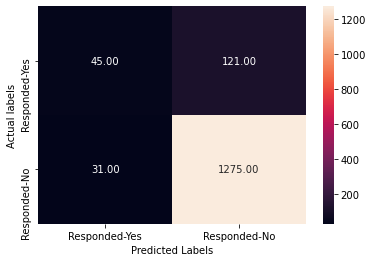

In [670]:
confusion_matrix(y_test, y_pred)

# Using Sampling techniques  we are balancing the data

In [671]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# upsampling

In [672]:

x_train_u,y_train_u =resample(x_train[y_train==1],
                             y_train[y_train==1],
                             n_samples = x_train[y_train==0].shape[0],
                             random_state=1)

In [673]:
x_train_u.shape

(5214, 43)

In [674]:
y_train_u.shape

(5214,)

In [675]:
x_train_u = np.concatenate((x_train[y_train==0],x_train_u))
y_train_u = np.concatenate((y_train[y_train==0],y_train_u))

In [676]:
print(x_train_u.shape)
print(y_train_u.shape)

(10428, 43)
(10428,)


In [677]:
log_reg_up=LogisticRegression(max_iter=1000)

In [678]:
log_reg_up.fit(x_train_u,y_train_u)

LogisticRegression(max_iter=1000)

In [679]:
y_pred_u= log_reg_up.predict(x_test)

In [680]:
print(metrics.classification_report(y_test, y_pred_u))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1306
           1       0.28      0.61      0.38       166

    accuracy                           0.78      1472
   macro avg       0.61      0.70      0.62      1472
weighted avg       0.87      0.78      0.81      1472



In [681]:
metrics.accuracy_score(y_test, y_pred_u)

0.7778532608695652

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


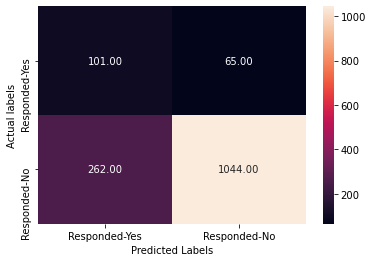

In [682]:
confusion_matrix(y_test, y_pred_u)

# Upsampling using SMOTE

In [683]:
sm1=SMOTE(random_state=12)
x_train_sm,y_train_sm = sm1.fit_resample(x_train,y_train)

In [684]:
log_reg_sm =LogisticRegression(max_iter=2000)

In [685]:
log_reg_sm.fit(x_train_sm,y_train_sm)

LogisticRegression(max_iter=2000)

In [686]:
y_pred_sm= log_reg_sm.predict(x_test)

In [687]:
print(metrics.classification_report(y_test, log_reg_sm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1306
           1       0.29      0.63      0.39       166

    accuracy                           0.78      1472
   macro avg       0.61      0.71      0.63      1472
weighted avg       0.87      0.78      0.81      1472



In [688]:
metrics.accuracy_score(y_test, y_pred_sm)

0.78125

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


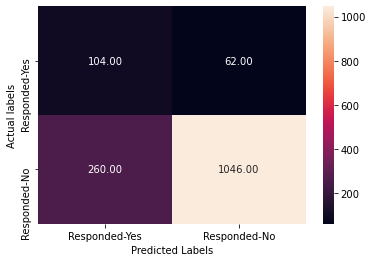

In [689]:
confusion_matrix(y_test, y_pred_sm)

# Down sampling

In [690]:

x_train_d,y_train_d =resample(x_train[y_train==0],
                             y_train[y_train==0],
                             n_samples = x_train[y_train==1].shape[0],
                             random_state=1)

In [691]:
x_train_d = np.concatenate((x_train[y_train==1],x_train_d))
y_train_d = np.concatenate((y_train[y_train==1],y_train_d))

In [692]:
log_reg_d =LogisticRegression(max_iter=1000)

In [693]:
log_reg_d.fit(x_train_d,y_train_d)

LogisticRegression(max_iter=1000)

In [694]:
y_pred_d= log_reg_d.predict(x_test)

In [695]:
print(metrics.classification_report(y_test, log_reg_d.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1306
           1       0.26      0.62      0.37       166

    accuracy                           0.76      1472
   macro avg       0.60      0.70      0.61      1472
weighted avg       0.87      0.76      0.80      1472



In [696]:
metrics.accuracy_score(y_test, y_pred_d)

0.7622282608695652

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


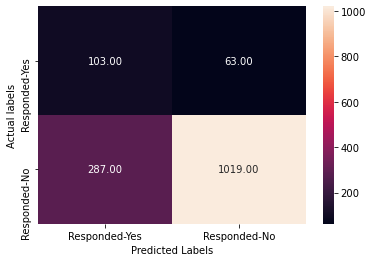

In [697]:
confusion_matrix(y_test, y_pred_d)

# using random forest

In [698]:
from sklearn.ensemble import RandomForestClassifier

In [699]:
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")

In [700]:
# using SMOTE data

In [701]:
classifier.fit(x_train_sm,y_train_sm)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [702]:
y_pred_rand_sm=classifier.predict(x_test)

In [703]:
metrics.accuracy_score(y_test, y_pred_rand_sm)

0.8756793478260869

In [704]:
print(metrics.classification_report(y_test, y_pred_rand_sm))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1306
           1       0.43      0.33      0.37       166

    accuracy                           0.88      1472
   macro avg       0.67      0.64      0.65      1472
weighted avg       0.86      0.88      0.87      1472



C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


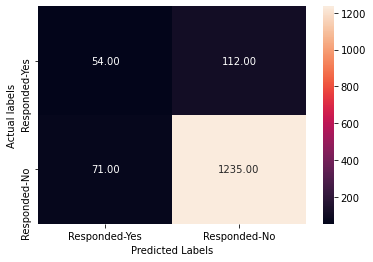

In [705]:
confusion_matrix(y_test, y_pred_rand_sm)

In [706]:
# using up sampling

In [707]:
classifier.fit(x_train_u,y_train_u)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [708]:
y_pred_rand_u=classifier.predict(x_test)

In [709]:
metrics.accuracy_score(y_test, y_pred_rand_u)

0.8661684782608695

In [710]:
print(metrics.classification_report(y_test, y_pred_rand_u))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1306
           1       0.39      0.33      0.36       166

    accuracy                           0.87      1472
   macro avg       0.65      0.63      0.64      1472
weighted avg       0.86      0.87      0.86      1472



C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


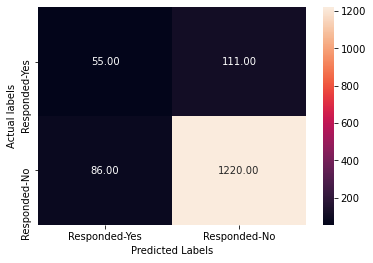

In [711]:
confusion_matrix(y_test, y_pred_rand_u)

In [712]:
# using down sampling

In [713]:
classifier.fit(x_train_d,y_train_d)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [714]:
y_pred_rand_d=classifier.predict(x_test)

In [715]:
metrics.accuracy_score(y_test, y_pred_rand_d)

0.7275815217391305

In [716]:
print(metrics.classification_report(y_test, y_pred_rand_d))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1306
           1       0.23      0.63      0.34       166

    accuracy                           0.73      1472
   macro avg       0.59      0.68      0.58      1472
weighted avg       0.86      0.73      0.77      1472



C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


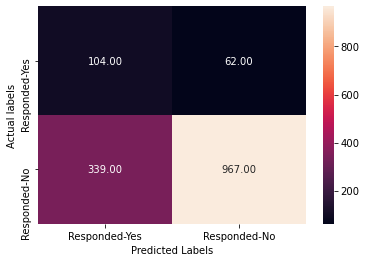

In [717]:
confusion_matrix(y_test, y_pred_rand_d)

In [149]:
def confusion_matrix(actual,predicted):
    cm=metrics.confusion_matrix(actual, predicted,[1,0])
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Responded-Yes','Responded-No'],yticklabels=['Responded-Yes','Responded-No'])
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted Labels')

In [718]:
# function for finding the columns which are highly correlated
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [720]:
corr_feature

{'day_of_week_basic.6y',
 'day_of_week_basic.9y',
 'day_of_week_high.school',
 'day_of_week_illiterate',
 'day_of_week_professional.course',
 'day_of_week_university.degree',
 'day_of_week_unknown',
 'euribor3m',
 'loan_unknown',
 'nr.employed',
 'poutcome_nonexistent',
 'poutcome_success'}

# Target group to make the campaign successful?  Recommend based on your analysis.

In [745]:
corr_column=correlation(coln,0.4)

In [733]:
corr_column

{'cons.price.idx', 'emp.var.rate', 'euribor3m', 'nr.employed', 'previous'}

In [735]:
coln=coln.drop(corr_column,axis=1)

# These are all columns Recommend to make the campaign successful

In [744]:
list(coln.columns)

['custAge',
 'profession',
 'marital',
 'schooling',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'poutcome',
 'cons.conf.idx',
 'responded']

# I am removing defalult columns from the list because it contains more number for unknown data

# Final RECOMMENDED variables are

# 
'custAge',
 'profession',
 'marital',
 'schooling',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'poutcome',
 'cons.conf.idx',
 'responded'